In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train = pd.read_csv('data/train.csv')
holiday = pd.read_csv('data/holidays_events.csv')

In [4]:
# remove holidays that are transferred

print(len(holiday))
holiday = holiday[holiday['transferred'] == False]
print(len(holiday))

350
338


In [5]:
holiday_dates = holiday['date'].unique()
holiday_dates.sort()

national_holidays_date = holiday[holiday['locale'] == 'National']
national_holidays_date = national_holidays_date['date'].unique()

In [6]:
merged = pd.merge(
    train,
    holiday,
    how='left',
    left_on='date',
    right_on='date',
    suffixes=('', '_holiday')
)
merged = merged.drop(columns=['transferred', 'description'])
display(merged)

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador
...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba


In [7]:
transaction = pd.read_csv('data/transactions.csv')

In [8]:
def filter_by_store_nbr(df, store_nbr):
    return df[df['store_nbr'] == store_nbr].copy()

def plot_transactions(df, store_nbr, show_holidays=False, holidays=None):
    df = filter_by_store_nbr(df, store_nbr)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    df = df.resample('D').sum()
    df = df.fillna(0)
    plt.figure(figsize=(20, 10))
    plt.plot(df.index, df['transactions'])
    plt.title(f'Store {store_nbr} transactions')
    plt.xlabel('Date')
    plt.ylabel('Transactions')
    if show_holidays:
        if holidays is None:
            raise ValueError("If show_holidays is True, holidays must be provided.")
        else:
            holidays_to_plot = pd.to_datetime(holidays)
        for h in holidays_to_plot:
            plt.axvline(h, color='red', linestyle='--', alpha=0.3)
    plt.show()

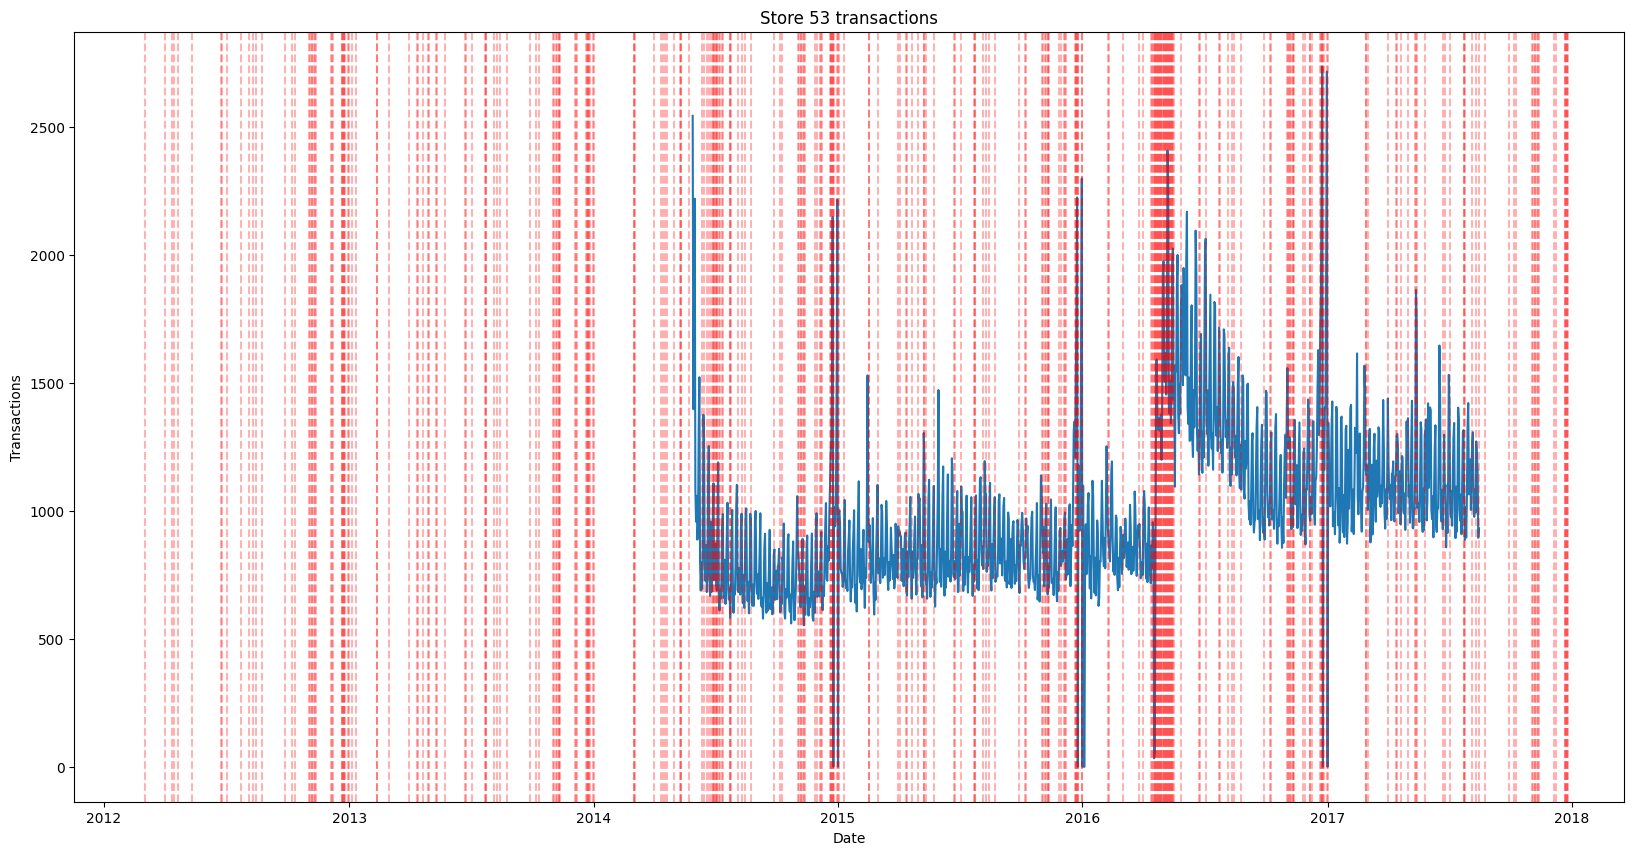

In [9]:
plot_transactions(transaction, 53, True, holiday_dates)

In [ ]:
stores = pd.read_csv('data/stores.csv')

grouped_stores = stores.groupby('cluster')

for name, group in grouped_stores:
    print(f"Cluster {name}:")
    print(group)
    print("\n")

Cluster 1:
    store_nbr       city        state type  cluster
23         24  Guayaquil       Guayas    D        1
24         25    Salinas  Santa Elena    D        1
26         27      Daule       Guayas    D        1


Cluster 2:
    store_nbr    city  state type  cluster
36         37  Cuenca  Azuay    D        2
41         42  Cuenca  Azuay    D        2


Cluster 3:
    store_nbr           city                           state type  cluster
15         16  Santo Domingo  Santo Domingo de los Tsachilas    C        3
29         30      Guayaquil                          Guayas    C        3
31         32      Guayaquil                          Guayas    C        3
32         33        Quevedo                        Los Rios    C        3
34         35         Playas                          Guayas    C        3
39         40        Machala                          El Oro    C        3
53         54      El Carmen                          Manabi    C        3


Cluster 4:
    store_nbr